# Exploratory data analysis 
## Focusing on Total crashes and total casualties


In [55]:
# importing packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
# pd.set_option('display.max_rows', None) # use this if only neccesary

In [56]:
# importing dataset and assigning a dataframe name to it
dcrash_data=pd.read_excel(r'C:\Users\nem\Desktop\pandas_ demo\Crash_Data_Queensland_Australia.xlsx')

#### Discover and understand data

In [57]:
# printing first 10 datasets of the crash data
dcrash_data.head()

,Crash_Year,Crash_Police_Region,Crash_Severity,Involving_Motorcycle_Moped,Involving_Truck,Involving_Bus,Count_Crashes,Count_Casualty_Fatality,Count_Casualty_Hospitalised,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_All
0,2001,Brisbane,Fatal,No,No,No,36,38,18,1,0,57
1,2001,Brisbane,Fatal,No,No,Yes,1,1,1,0,0,2
2,2001,Brisbane,Fatal,No,Yes,No,1,1,0,1,2,4
3,2001,Brisbane,Fatal,Yes,No,No,5,5,0,2,0,7
4,2001,Brisbane,Fatal,Yes,Yes,No,1,1,0,0,0,1


In [58]:
# Describing dataset
dcrash_data.describe()

,Crash_Year,Count_Crashes,Count_Casualty_Fatality,Count_Casualty_Hospitalised,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_All
count,3246.000000,3246.000000,3246.000000,3246.000000,3246.000000,3246.000000,3246.000000
mean,2010.230437,113.133087,1.849661,41.716266,46.938694,24.535736,115.040357
std,6.028735,273.500969,6.343205,161.366418,202.319337,93.586468,291.736466
min,2001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2010.000000,13.000000,0.000000,0.000000,1.000000,1.000000,14.000000
75%,2015.000000,63.000000,0.000000,4.000000,8.000000,8.000000,66.000000
max,2021.000000,2276.000000,60.000000,1393.000000,2070.000000,1393.000000,2192.000000


In [5]:
# checking the info of  dataset

dcrash_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246 entries, 0 to 3245
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Crash_Year                       3246 non-null   int64 
 1   Crash_Police_Region              3246 non-null   object
 2   Crash_Severity                   3246 non-null   object
 3   Involving_Motorcycle_Moped       3246 non-null   object
 4   Involving_Truck                  3246 non-null   object
 5   Involving_Bus                    3246 non-null   object
 6   Count_Crashes                    3246 non-null   int64 
 7   Count_Casualty_Fatality          3246 non-null   int64 
 8   Count_Casualty_Hospitalised      3246 non-null   int64 
 9   Count_Casualty_MedicallyTreated  3246 non-null   int64 
 10  Count_Casualty_MinorInjury       3246 non-null   int64 
 11  Count_Casualty_All               3246 non-null   int64 
dtypes: int64(7), object(5)
memory usag

In [6]:
# checking for unique values
dcrash_data.nunique()

Crash_Year                          21
Crash_Police_Region                  8
Crash_Severity                       5
Involving_Motorcycle_Moped           2
Involving_Truck                      2
Involving_Bus                        2
Count_Crashes                      538
Count_Casualty_Fatality             52
Count_Casualty_Hospitalised        303
Count_Casualty_MedicallyTreated    290
Count_Casualty_MinorInjury         238
Count_Casualty_All                 525
dtype: int64

In [7]:
# Check for null values

dcrash_data.isnull().sum()

# there is no null value in the data

Crash_Year                         0
Crash_Police_Region                0
Crash_Severity                     0
Involving_Motorcycle_Moped         0
Involving_Truck                    0
Involving_Bus                      0
Count_Crashes                      0
Count_Casualty_Fatality            0
Count_Casualty_Hospitalised        0
Count_Casualty_MedicallyTreated    0
Count_Casualty_MinorInjury         0
Count_Casualty_All                 0
dtype: int64

In [8]:
# checking to see if there is missing data
for col in dcrash_data.columns:
    missing_data_pct=np.mean(dcrash_data[col].isnull())
    print('{} - {}%'.format(col,missing_data_pct) )

Crash_Year - 0.0%
Crash_Police_Region - 0.0%
Crash_Severity - 0.0%
Involving_Motorcycle_Moped - 0.0%
Involving_Truck - 0.0%
Involving_Bus - 0.0%
Count_Crashes - 0.0%
Count_Casualty_Fatality - 0.0%
Count_Casualty_Hospitalised - 0.0%
Count_Casualty_MedicallyTreated - 0.0%
Count_Casualty_MinorInjury - 0.0%
Count_Casualty_All - 0.0%


 There are no missind data 

In [9]:
# CORRELATION
# Convert all data to numerics for proper correlation

In [10]:
# converting all data in the data set to numerics for correlation
crash_data_numerics = dcrash_data
for col_name in crash_data_numerics.columns:
    if (crash_data_numerics[col_name].dtype == 'object'):
        crash_data_numerics[col_name]=crash_data_numerics[col_name].astype('category')
        crash_data_numerics[col_name]=crash_data_numerics[col_name].cat.codes
    

    
crash_data_numerics.head()

,Crash_Year,Crash_Police_Region,Crash_Severity,Involving_Motorcycle_Moped,Involving_Truck,Involving_Bus,Count_Crashes,Count_Casualty_Fatality,Count_Casualty_Hospitalised,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_All
0,2001,0,0,0,0,0,36,38,18,1,0,57
1,2001,0,0,0,0,1,1,1,1,0,0,2
2,2001,0,0,0,1,0,1,1,0,1,2,4
3,2001,0,0,1,0,0,5,5,0,2,0,7
4,2001,0,0,1,1,0,1,1,0,0,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

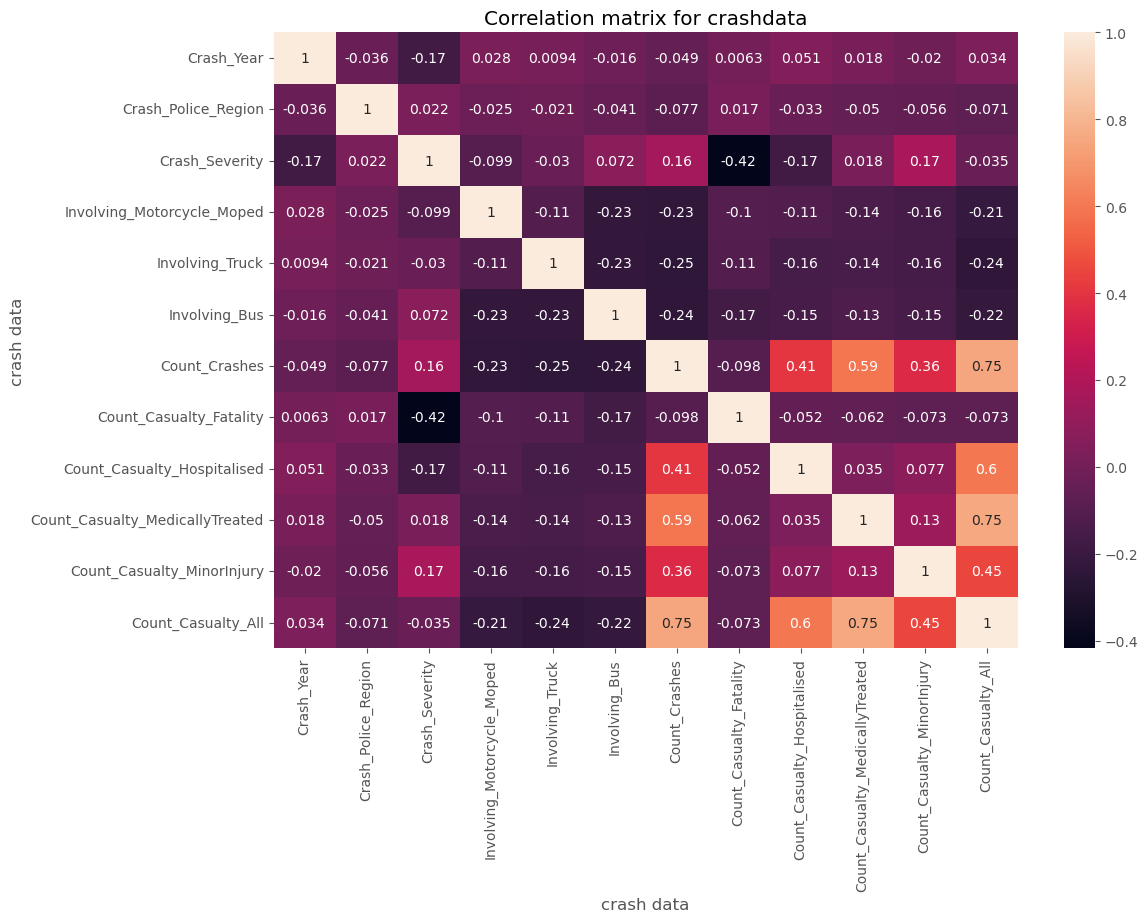

In [11]:
# overall correlations

correlation_matrix = crash_data_numerics.corr(method ='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for crashdata')
plt.xlabel('crash data')
plt.ylabel('crash data')
plt.show

In [12]:
# working further on the correlation

crash_data_numerics.corr()

,Crash_Year,Crash_Police_Region,Crash_Severity,Involving_Motorcycle_Moped,Involving_Truck,Involving_Bus,Count_Crashes,Count_Casualty_Fatality,Count_Casualty_Hospitalised,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_All
Crash_Year,1.000000,-0.035512,-0.173124,0.028486,0.009352,-0.016217,-0.048940,0.006305,0.050758,0.017765,-0.019597,0.034246
Crash_Police_Region,-0.035512,1.000000,0.021524,-0.024593,-0.020682,-0.041277,-0.076537,0.017046,-0.033082,-0.050186,-0.055807,-0.070634
Crash_Severity,-0.173124,0.021524,1.000000,-0.098908,-0.030153,0.072067,0.160199,-0.417740,-0.168637,0.017862,0.170695,-0.035215
Involving_Motorcycle_Moped,0.028486,-0.024593,-0.098908,1.000000,-0.111118,-0.226145,-0.229871,-0.102408,-0.113352,-0.138625,-0.162463,-0.213177
Involving_Truck,0.009352,-0.020682,-0.030153,-0.111118,1.000000,-0.225013,-0.245922,-0.108924,-0.155229,-0.141992,-0.160951,-0.238333
Involving_Bus,-0.016217,-0.041277,0.072067,-0.226145,-0.225013,1.000000,-0.237696,-0.166516,-0.147261,-0.129425,-0.147562,-0.222167
Count_Crashes,-0.048940,-0.076537,0.160199,-0.229871,-0.245922,-0.237696,1.000000,-0.098063,0.406771,0.591610,0.362474,0.749423
Count_Casualty_Fatality,0.006305,0.017046,-0.417740,-0.102408,-0.108924,-0.166516,-0.098063,1.000000,-0.052313,-0.061732,-0.072607,-0.073296
Count_Casualty_Hospitalised,0.050758,-0.033082,-0.168637,-0.113352,-0.155229,-0.147261,0.406771,-0.052313,1.000000,0.034905,0.077249,0.600974
Count_Casualty_MedicallyTreated,0.017765,-0.050186,0.017862,-0.138625,-0.141992,-0.129425,0.591610,-0.061732,0.034905,1.000000,0.134114,0.754487


In [13]:
# unstacking correlation to make it  easier to see the pairings well
unstack_correlation_matrix = crash_data_numerics.corr()
correlation_pairs = unstack_correlation_matrix.unstack()
correlation_pairs

Crash_Year          Crash_Year                         1.000000
                    Crash_Police_Region               -0.035512
                    Crash_Severity                    -0.173124
                    Involving_Motorcycle_Moped         0.028486
                    Involving_Truck                    0.009352
                                                         ...   
Count_Casualty_All  Count_Casualty_Fatality           -0.073296
                    Count_Casualty_Hospitalised        0.600974
                    Count_Casualty_MedicallyTreated    0.754487
                    Count_Casualty_MinorInjury         0.454949
                    Count_Casualty_All                 1.000000
Length: 144, dtype: float64

In [14]:
# sort the correlated pairs
sorted_pairs= correlation_pairs.sort_values()
sorted_pairs

Count_Casualty_Fatality     Crash_Severity               -0.417740
Crash_Severity              Count_Casualty_Fatality      -0.417740
Count_Crashes               Involving_Truck              -0.245922
Involving_Truck             Count_Crashes                -0.245922
Count_Casualty_All          Involving_Truck              -0.238333
                                                            ...   
Involving_Motorcycle_Moped  Involving_Motorcycle_Moped    1.000000
Crash_Severity              Crash_Severity                1.000000
Crash_Police_Region         Crash_Police_Region           1.000000
Count_Casualty_MinorInjury  Count_Casualty_MinorInjury    1.000000
Count_Casualty_All          Count_Casualty_All            1.000000
Length: 144, dtype: float64

In [15]:
#investigate high correlation
high_correlation= sorted_pairs[(sorted_pairs)> 0.5] 

high_correlation

Count_Casualty_MedicallyTreated  Count_Crashes                      0.591610
Count_Crashes                    Count_Casualty_MedicallyTreated    0.591610
Count_Casualty_Hospitalised      Count_Casualty_All                 0.600974
Count_Casualty_All               Count_Casualty_Hospitalised        0.600974
                                 Count_Crashes                      0.749423
Count_Crashes                    Count_Casualty_All                 0.749423
Count_Casualty_MedicallyTreated  Count_Casualty_All                 0.754487
Count_Casualty_All               Count_Casualty_MedicallyTreated    0.754487
Crash_Year                       Crash_Year                         1.000000
Count_Casualty_MedicallyTreated  Count_Casualty_MedicallyTreated    1.000000
Count_Casualty_Hospitalised      Count_Casualty_Hospitalised        1.000000
Count_Casualty_Fatality          Count_Casualty_Fatality            1.000000
Count_Crashes                    Count_Crashes                      1.000000

### Results
1. The number of crashes recorded had a high correlation with the number of casualties medicaly treated.
2. The number of casualties hospitalised had a high correlation with the number of number of All casualties.
3. The number of crashes recorded had a high correlation with the number of All casualties.
4. The number of medically treated had a high correlation with the number of number of All casualties.
5. All of these correlations were Positive.


In [60]:
# Dropping columns to streamline the analysis.
# Crash_Severity, Involving_Motorcycle_Moped , Involving_Truck, Involving_Bus'

crash_data=dcrash_data.drop(['Crash_Severity','Involving_Motorcycle_Moped','Involving_Truck','Involving_Bus'], axis = 1)
crash_data.head()


,Crash_Year,Crash_Police_Region,Count_Crashes,Count_Casualty_Fatality,Count_Casualty_Hospitalised,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_All
0,2001,Brisbane,36,38,18,1,0,57
1,2001,Brisbane,1,1,1,0,0,2
2,2001,Brisbane,1,1,0,1,2,4
3,2001,Brisbane,5,5,0,2,0,7
4,2001,Brisbane,1,1,0,0,0,1


In [17]:
# checking the shape of the crash dataset
crash_data.shape
# this shows that there are 3246 rows and 12 columns available in the crash dataset

(3246, 8)

In [18]:
# check for unique values
crash_data.nunique()

Crash_Year                          21
Crash_Police_Region                  8
Count_Crashes                      538
Count_Casualty_Fatality             52
Count_Casualty_Hospitalised        303
Count_Casualty_MedicallyTreated    290
Count_Casualty_MinorInjury         238
Count_Casualty_All                 525
dtype: int64

In [19]:
# check for various regions where the data was collected from
# use this code with and substitute the columns for the actual values

crash_data['Crash_Police_Region'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8)

In [20]:
 crash_data.shape

(3246, 8)

In [21]:
# check to see if  there are any duplicates
# do this by dropping duplicates
# compare the results with the two results. if there is any difference, then it means there were duplicate

dropped_duplicate=crash_data.drop_duplicates()
dropped_duplicate.shape

(3164, 8)

100 records were removed from the dataset showing that there were 100 duplicated records.

In [22]:
# renaming dropped_duplicate to crash data for analysis

crash_data = dropped_duplicate


In [61]:
crash_data.head()

,Crash_Year,Crash_Police_Region,Count_Crashes,Count_Casualty_Fatality,Count_Casualty_Hospitalised,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_All
0,2001,Brisbane,36,38,18,1,0,57
1,2001,Brisbane,1,1,1,0,0,2
2,2001,Brisbane,1,1,0,1,2,4
3,2001,Brisbane,5,5,0,2,0,7
4,2001,Brisbane,1,1,0,0,0,1


## Exploration

1. we will use a bar chart, boxplot and scatter plot will be most helpful in the understanding of this data.
2. A box plot will be helpful to determine outliers and where the bulk of the data points reside interms of crashes and casualties
3. A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables,crashes and casualties
4. A bar chart will help determine average number of incidence of crashes and casualties yearly.

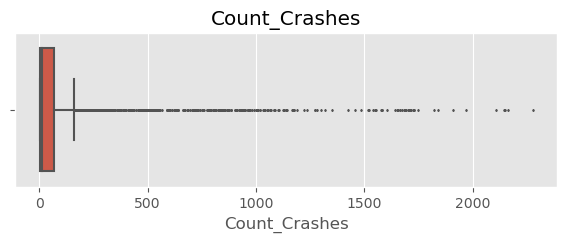

In [24]:
# check for oultiers in count crashes using box plot
plt.figure(figsize=(7,2))
plt.title('Count_Crashes')
sns.boxplot(data=None, x=crash_data['Count_Crashes'], fliersize=1);




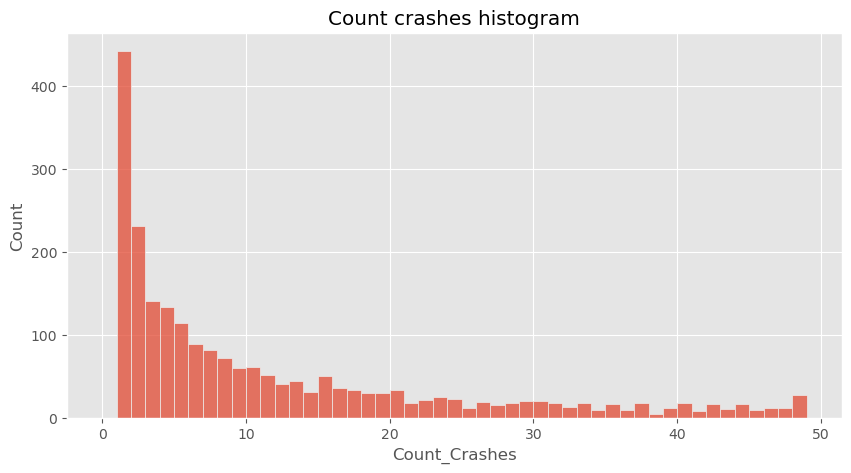

In [25]:
# Create histogram of count crashes
plt.figure(figsize=(10,5))
sns.histplot(crash_data['Count_Crashes'], bins=range(0,50,1))
plt.title('Count crashes histogram');

The distribution is not a normal distribution.
crashes were common at the early years of data recording buit it improved with time. this may be due to many factors include proper 
enforcement of road laws amongst others.

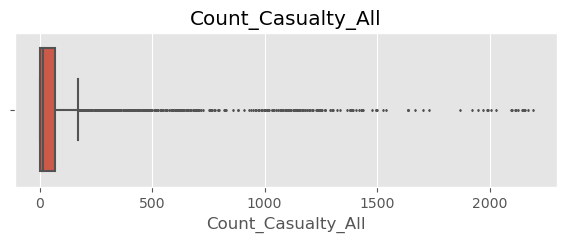

In [26]:
# check for oultiers in all casualties using box plot
plt.figure(figsize=(7,2))
plt.title('Count_Casualty_All')
sns.boxplot(data=None, x=crash_data['Count_Casualty_All'], fliersize=1);



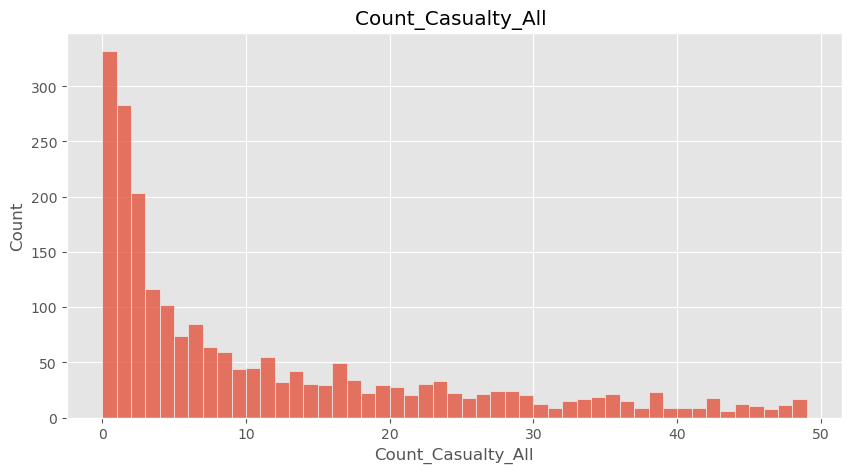

In [27]:
# Create histogram of all casualties
plt.figure(figsize=(10,5))
sns.histplot(crash_data['Count_Casualty_All'], bins=range(0,50,1))
plt.title('Count_Casualty_All ');

The distribution is not a normal distribution.
Casualties were commone at the early years of data recording buit it improved with time. this may be due to many factors include proper 
enforcement of road laws amongst others.

In [62]:
# Number of times  Police region recorded a crash

crash_data['Crash_Police_Region'].value_counts()

Crash_Police_Region
Brisbane         540
South Eastern    490
North Coast      460
Southern         440
Central          418
Far Northern     418
Northern         402
Unknown           78
Name: count, dtype: int64

1.  Brisbane recorded the highest number of incidence whilst northern the lowest
2.  unknown regions recorded 78 incidence

In [63]:
# Calculate the average crashes per police region

mean_region_crashes = crash_data.groupby(['Crash_Police_Region'])[['Count_Crashes']].mean()

mean_region_crashes


,Count_Crashes
Crash_Police_Region,
Brisbane,203.398148
Central,79.602871
Far Northern,53.454545
North Coast,151.693478
Northern,51.584577
South Eastern,131.716327
Southern,104.822727
Unknown,7.666667


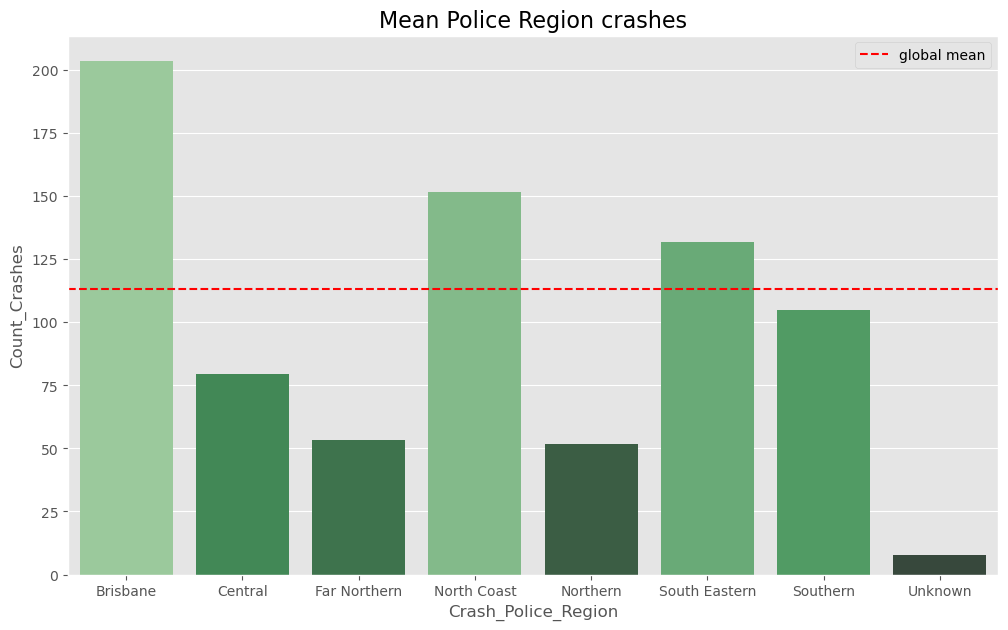

In [64]:
 # deploy the average regional crashes on a bar graph
    
data = mean_region_crashes.head(10)
pal = sns.color_palette("Greens_d", len(data))
rank = data['Count_Crashes'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
y=data['Count_Crashes'],
palette=np.array(pal[::-1])[rank])
ax.axhline(crash_data['Count_Crashes'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean Police Region crashes', fontsize=16);

1.  Brisbane had the highest average or mean 
2.  Northern had the lowest average or mean however the unknown regions had less mean than Northern





In [65]:
# Calculate the average Casualty per each Region 
mean_region_casualties = crash_data.groupby(['Crash_Police_Region'])[['Count_Casualty_All']].mean()

mean_region_casualties


,Count_Casualty_All
Crash_Police_Region,
Brisbane,206.981481
Central,78.272727
Far Northern,53.220096
North Coast,153.571739
Northern,50.975124
South Eastern,142.848980
Southern,102.336364
Unknown,6.769231


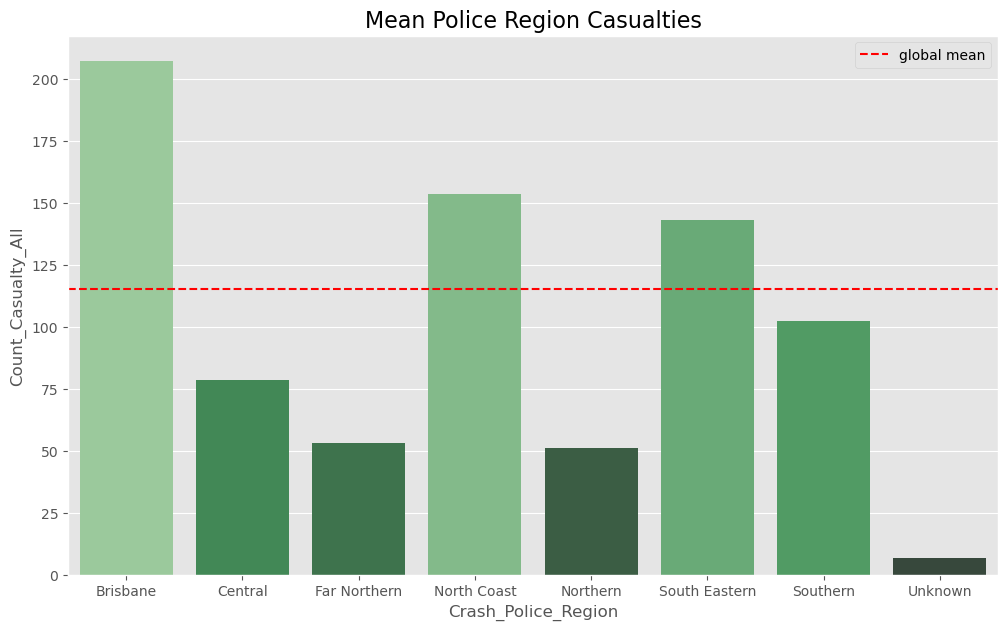

In [66]:
 # deploy the average casualties on a bargraph
    
data = mean_region_casualties.head(10)
pal = sns.color_palette("Greens_d", len(data))
rank = data['Count_Casualty_All'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
y=data['Count_Casualty_All'],
palette=np.array(pal[::-1])[rank])
ax.axhline(crash_data['Count_Casualty_All'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean Police Region Casualties', fontsize=16);

1.  Brisbane had the highest average or mean 
2.  Northern had the lowest average or mean however the unknown regions had less mean than Northern


In [33]:
# Getting the total number incidents per year

yearly_incidents =crash_data['Crash_Year'].value_counts()
yearly_incidents

Crash_Year
2007    180
2004    179
2008    177
2002    173
2003    172
2009    172
2010    172
2001    171
2005    170
2006    170
2011    135
2012    133
2021    133
2014    131
2013    130
2016    129
2017    129
2018    129
2015    128
2019    127
2020    124
Name: count, dtype: int64

In [34]:
# Re-order year in  a proper manner (ascending)

year_order = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
yearly_incidents = yearly_incidents.reindex(index = year_order)
yearly_incidents

Crash_Year
2001    171
2002    173
2003    172
2004    179
2005    170
2006    170
2007    180
2008    177
2009    172
2010    172
2011    135
2012    133
2013    130
2014    131
2015    128
2016    129
2017    129
2018    129
2019    127
2020    124
Name: count, dtype: int64

In [35]:
yearly_incidents.describe()

count     20.00000
mean     151.55000
std       22.86223
min      124.00000
25%      129.00000
50%      152.50000
75%      172.00000
max      180.00000
Name: count, dtype: float64

In [36]:
# show year index
yearly_incidents.index

Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype='int64', name='Crash_Year')

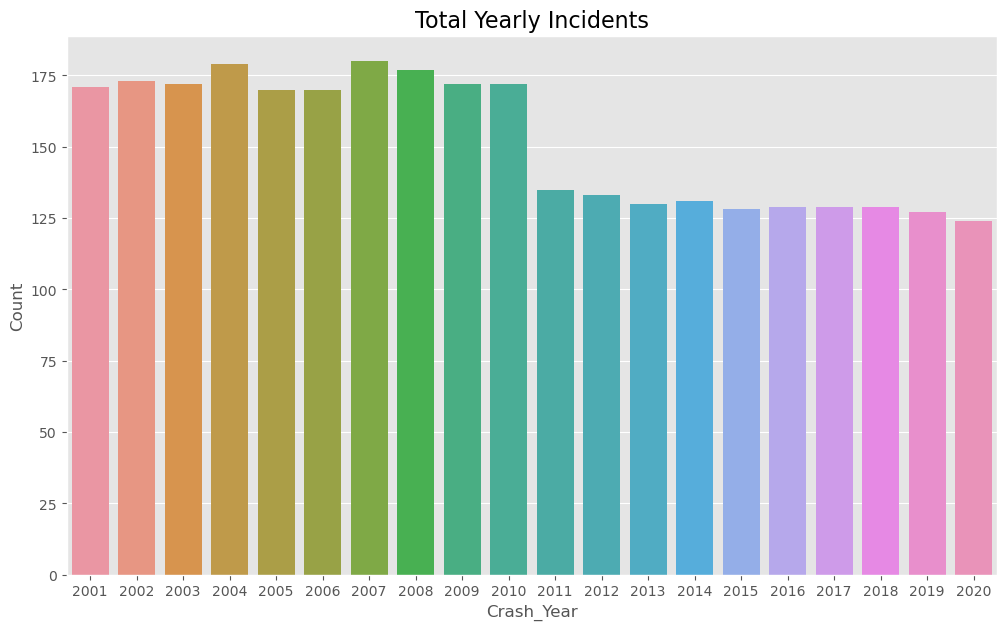

In [37]:
# Create a bar graph to plot the incedence or occurrance per year

plt.figure(figsize=(12,7))
ax = sns.barplot(x=yearly_incidents.index, y=yearly_incidents)
ax.set_xticklabels(year_order)
ax.set_ylabel('Count')
plt.title('Total Yearly Incidents', fontsize=16);

Years 2001 to 2010 recorded high incidence with little flatuations between them.


In [38]:
# overall total casualties
crash_data['Count_Casualty_All'].sum()

373311

In [39]:
# Highest number of casualties
crash_data['Count_Casualty_All'].max()

2192

In [40]:
# Lowest number of casualties
crash_data['Count_Casualty_All'].min()

0

In [41]:
# average casualties
crash_data['Count_Casualty_All'].mean()

117.9870417193426

In [42]:
# Repeat the process, this time for total casualties by year
year_order = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
total_year_casualties = crash_data.groupby('Crash_Year')[['Count_Casualty_All']].sum()
total_year_casualties = total_year_casualties.reindex(index=year_order)
total_year_casualties

,Count_Casualty_All
Crash_Year,
2001,18353
2002,18397
2003,18145
2004,18482
2005,18319
2006,18537
2007,20046
2008,20314
2009,19038


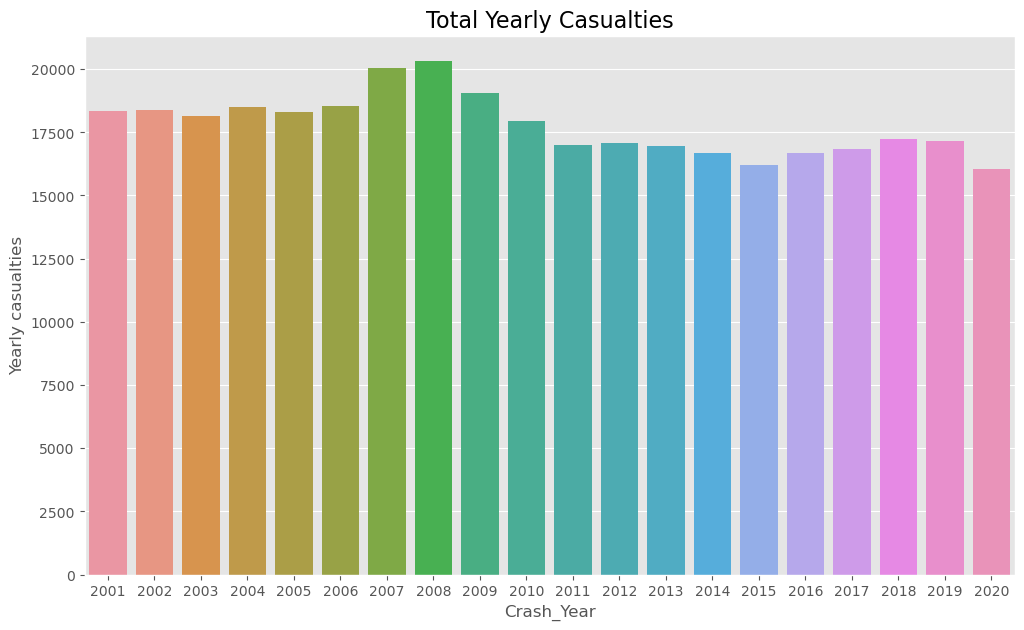

In [43]:
# Create a bar chart plot of total casualties per year
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_year_casualties.index, y=total_year_casualties['Count_Casualty_All'])
ax.set_xticklabels(year_order)
ax.set_ylabel('Yearly casualties')
plt.title('Total Yearly Casualties', fontsize=16);

Years 2007 and 2008 recorded the highest number of casualties whilst the other years flactuated around the  figure of 15000 to 20000



In [44]:
# Repeat the process, this time for total crashes by year
year_order = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
total_year_crashes = crash_data.groupby('Crash_Year')[['Count_Crashes']].sum()
total_year_crashes = total_year_crashes.reindex(index=year_order)
total_year_crashes

,Count_Crashes
Crash_Year,
2001,22012
2002,22311
2003,22388
2004,23437
2005,23073
2006,22452
2007,22841
2008,23517
2009,22936


In [45]:
# Crashes data overview
crash_data['Count_Crashes'].describe()

count    3164.000000
mean      116.025917
std       276.424688
min         1.000000
25%         3.000000
50%        14.000000
75%        66.000000
max      2276.000000
Name: Count_Crashes, dtype: float64

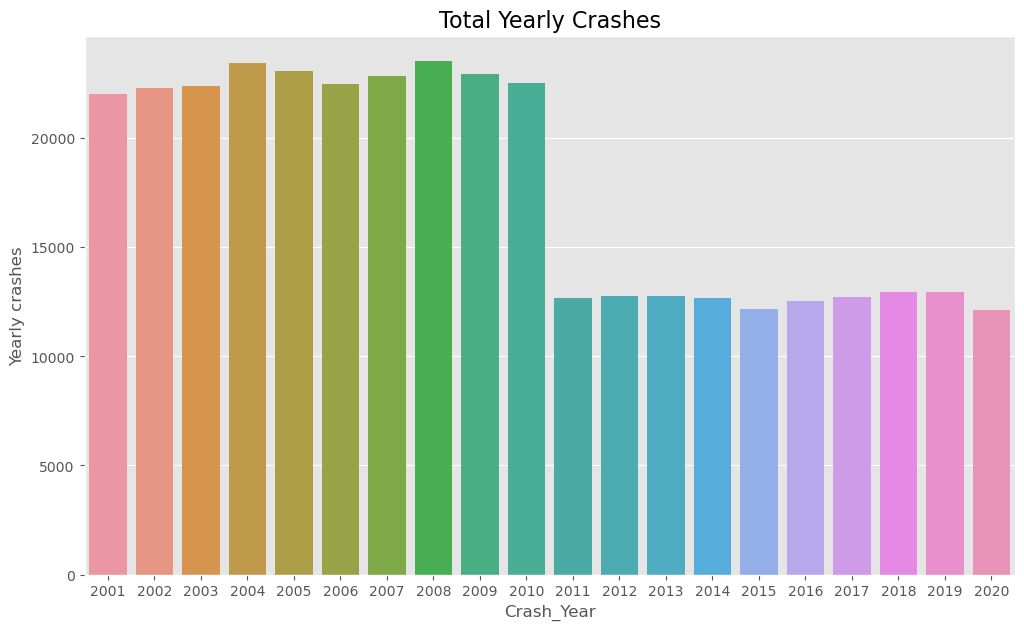

In [46]:
# Create a bar chart plot of total casualties per year
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_year_crashes.index, y=total_year_crashes['Count_Crashes'])
ax.set_xticklabels(year_order)
ax.set_ylabel('Yearly crashes')
plt.title('Total Yearly Crashes', fontsize=16);

1. years 2001 to 2010 recorded Relatively high number of crashes. the difference of number of crashes amongst these years were not too wide
2.  2011 t0 2020 saw a significant drop in crashes.

In [47]:
crash_data.columns

Index(['Crash_Year', 'Crash_Police_Region', 'Count_Crashes',
       'Count_Casualty_Fatality', 'Count_Casualty_Hospitalised',
       'Count_Casualty_MedicallyTreated', 'Count_Casualty_MinorInjury',
       'Count_Casualty_All'],
      dtype='object')

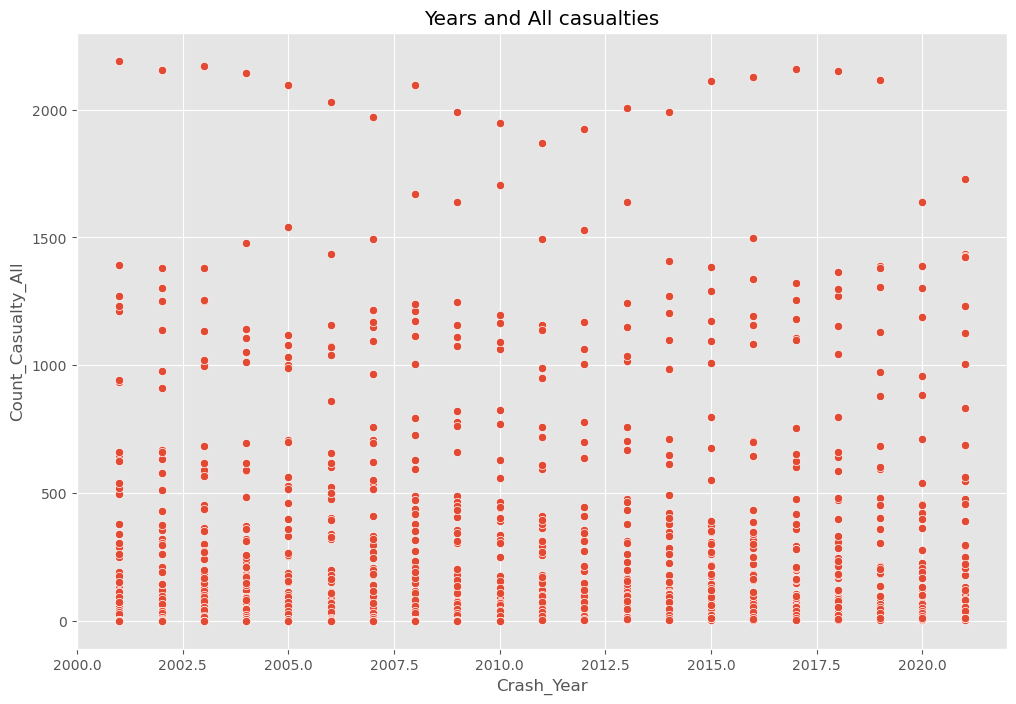

In [67]:
# comparing two variables scatter plot
ax=sns.scatterplot(
               x='Crash_Year',
               y='Count_Casualty_All',
               data= crash_data )
ax.set_title('Years and All casualties') 
plt.show()

The casualties were fairly dstributed over the years

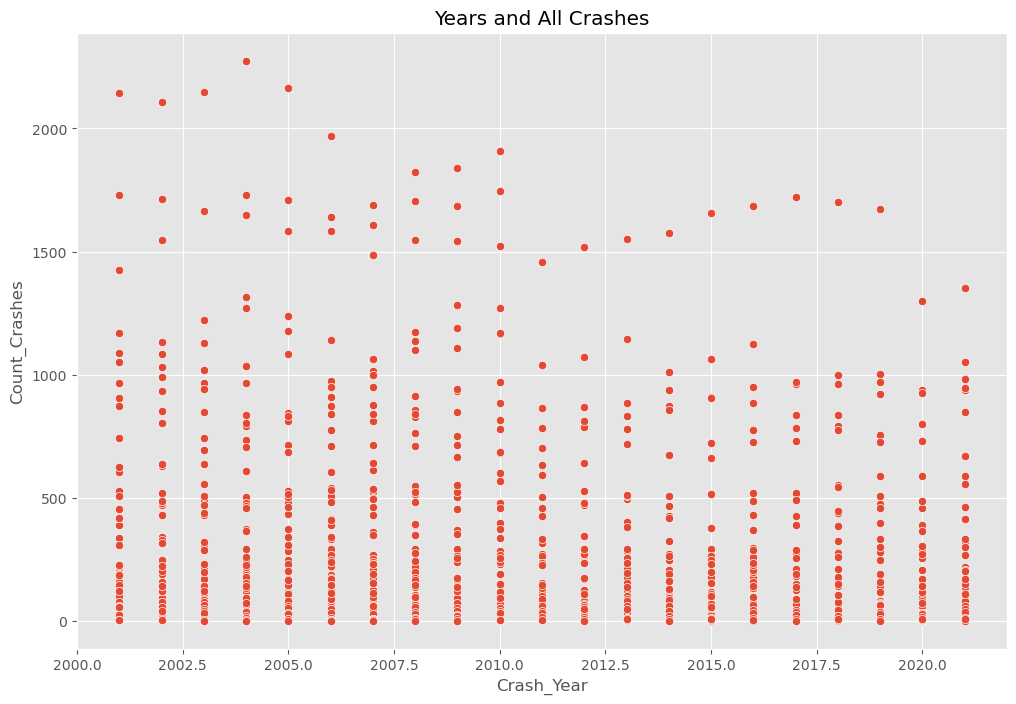

In [49]:
# comparing two variables scatter plot
ax=sns.scatterplot(
               x='Crash_Year',
               y='Count_Crashes',
               data= crash_data )
ax.set_title('Years and All Crashes') 
plt.show()

The Crashes were fairly dstributed over the years